## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/GL-AIML/assignment/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
import numpy as np
labels = pd.read_csv("labels.csv")

In [11]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
labels.values

array([['000bec180eb18c7604dcecc8fe0dba07', 'boston_bull'],
       ['001513dfcb2ffafc82cccf4d8bbaba97', 'dingo'],
       ['001cdf01b096e06d78e9e5112d419397', 'pekinese'],
       ...,
       ['ffe2ca6c940cddfee68fa3cc6c63213f', 'airedale'],
       ['ffe5f6d8e2bff356e9482a80a6e29aac', 'miniature_pinscher'],
       ['fff43b07992508bc822f33d8ffd902ae', 'chesapeake_bay_retriever']],
      dtype=object)

### Print the count of each category of Dogs given in the dataset



In [13]:
breedcount = labels['breed'].value_counts()
breedcount

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [14]:
breedcount.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

### Get one-hot encodings of labels

In [15]:
onehot_y = np.array(pd.get_dummies(pd.Series(labels['breed']),sparse=True))
onehot_y.shape

(10222, 120)

In [16]:
onehot_y[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [17]:
from tqdm import tqdm
import cv2

rows = 128
cols = 128
channals = 3

X = []
y = []

i = 0
for id, breed in tqdm(labels.values):
    trainimg = cv2.imread('./train/{}.jpg'.format(id),1)
    trainimg_resize = cv2.resize(trainimg,(rows,cols))
    X.append(trainimg_resize)
    y.append(onehot_y[i]) 
    i = i + 1

100%|██████████| 10222/10222 [00:27<00:00, 376.59it/s]


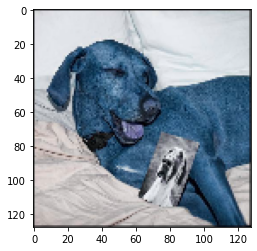

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X[100])

In [19]:
y[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [20]:
import numpy as np
X_data = np.array(X, np.float32) / 255.   # /= 255 for normolisation
print (X_data.shape)

(10222, 128, 128, 3)


In [21]:
y_data = np.array(y, np.uint8)
print(y_data.shape)

(10222, 120)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1234)
print (X_train.shape)
print (X_test.shape)


(7155, 128, 128, 3)
(3067, 128, 128, 3)


In [23]:
print (y_train.shape)
print (y_test.shape)

(7155, 120)
(3067, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [24]:
submission = pd.read_csv('./sample_submission.csv')
test_img = submission['id']
print (test_img.head(5))

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object


In [25]:
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

Run the below code to load the test image files in x_test_feature

In [26]:
X_test_features = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (128,128))
    X_test_features.append(img_resize)

100%|██████████| 10357/10357 [00:13<00:00, 789.00it/s]


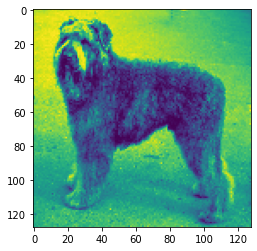

In [27]:
plt.imshow(X_test_features[100])

Normalize the test data and convert it into 4 dimensions

In [28]:
rows , cols, channel = 128, 128, 3
input_shape = (rows, cols, 1)

X_test_data = np.array(X_test_features, np.float32) / 255.   # /= 255 for normolisation
print (X_test_data.shape)
X_test_data = np.expand_dims(X_test_data, axis = 3)
print (X_test_data.shape)

(10357, 128, 128)
(10357, 128, 128, 1)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [29]:
from keras.models import Sequential  # initial NN
from keras.layers import Dense, Dropout, Flatten # construct each layer
from keras.layers import Convolution2D # swipe across the image by 1
from keras.layers import MaxPooling2D # swipe across by pool size


Using TensorFlow backend.


In [30]:
model = Sequential()
model.add(Convolution2D (filters = 64,kernel_size = (5,3), activation ='relu', input_shape = (128,128,3))) 
model.add(Flatten()) 
# fully connected ANN 
model.add(Dense(units = 256, activation = 'relu')) 
# output layer
model.add(Dense(units = 120, activation = 'softmax')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 126, 64)      2944      
_________________________________________________________________
flatten_1 (Flatten)          (None, 999936)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               255983872 
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 256,017,656
Trainable params: 256,017,656
Non-trainable params: 0
_________________________________________________________________


### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"]) 

In [32]:
print('Training set = ', X_train.shape, y_train.shape)
print('Test set = ', X_test.shape, y_test.shape)

Training set =  (7155, 128, 128, 3) (7155, 120)
Test set =  (3067, 128, 128, 3) (3067, 120)


In [33]:
batch_size = 128 
nb_epochs = 10
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epochs,
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    initial_epoch=0)

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 22s 3ms/step - loss: 9.3906 - accuracy: 0.0113 - val_loss: 4.7870 - val_accuracy: 0.0095
Epoch 2/10
7155/7155 [==============================] - 14s 2ms/step - loss: 4.7420 - accuracy: 0.0270 - val_loss: 4.7474 - val_accuracy: 0.0176
Epoch 3/10
7155/7155 [==============================] - 14s 2ms/step - loss: 3.7770 - accuracy: 0.2437 - val_loss: 4.7901 - val_accuracy: 0.0320
Epoch 4/10
7155/7155 [==============================] - 15s 2ms/step - loss: 0.8165 - accuracy: 0.8661 - val_loss: 5.8668 - val_accuracy: 0.0352
Epoch 5/10
7155/7155 [==============================] - 15s 2ms/step - loss: 0.0820 - accuracy: 0.9918 - val_loss: 6.4619 - val_accuracy: 0.0362
Epoch 6/10
7155/7155 [==============================] - 15s 2ms/step - loss: 0.0425 - accuracy: 0.9980 - val_loss: 6.5252 - val_accuracy: 0.0375
Epoch 7/10
7155/7155 [==============================] - 15s 2ms/step - loss: 0.027

In [34]:
score = model.evaluate(X_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

3067/3067 [==============================] - 1s 473us/step
loss: 6.605714194270116
accuracy: 0.03260515257716179


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=True)  # randomly flip images

In [0]:
val_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=True)  # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(X_train, y_train,batch_size=128) 
val_generator = val_datagen.flow(X_test, y_test,batch_size=128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [38]:
model.fit_generator(train_generator,
                    epochs=10,steps_per_epoch=100,
                    validation_data=val_generator)

Epoch 1/10
100/100 [==============================] - 61s 607ms/step - loss: 4.7777 - accuracy: 0.0249 - val_loss: 4.8040 - val_accuracy: 0.0209
Epoch 2/10
100/100 [==============================] - 57s 569ms/step - loss: 4.6293 - accuracy: 0.0296 - val_loss: 4.5998 - val_accuracy: 0.0231
Epoch 3/10
100/100 [==============================] - 57s 566ms/step - loss: 4.5542 - accuracy: 0.0359 - val_loss: 4.6172 - val_accuracy: 0.0310
Epoch 4/10
100/100 [==============================] - 57s 566ms/step - loss: 4.4896 - accuracy: 0.0464 - val_loss: 4.6206 - val_accuracy: 0.0280
Epoch 5/10
100/100 [==============================] - 54s 540ms/step - loss: 4.4248 - accuracy: 0.0495 - val_loss: 4.5303 - val_accuracy: 0.0258
Epoch 6/10
100/100 [==============================] - 60s 596ms/step - loss: 4.3725 - accuracy: 0.0549 - val_loss: 4.6637 - val_accuracy: 0.0320
Epoch 7/10
100/100 [==============================] - 57s 567ms/step - loss: 4.3166 - accuracy: 0.0637 - val_loss: 4.4836 - val_ac

In [39]:
score = model.evaluate(X_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

3067/3067 [==============================] - 1s 445us/step
loss: 4.556597434934125
accuracy: 0.05184219032526016


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input

# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/drive/My Drive/GL-AIML/assignment/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [74]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
updated_model = Sequential()
updated_model.add(base_model)

# model = updated_model
updated_model.add(Flatten()) 
updated_model.add(Dense(units = 1024, activation = 'relu')) 

updated_model.add(Dense(units = 256, activation = 'relu')) 
# output layer
updated_model.add(Dense(units = 120, activation = 'softmax')) 


### Make all the layers in the base_model (VGG16) to be non-trainable

In [76]:
updated_model.layers[0].trainable = False
   # check structure
updated_model.summary()  

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_23 (Dense)             (None, 120)               30840     
Total params: 15,533,240
Trainable params: 818,552
Non-trainable params: 14,714,688
_________________________________________________________________


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [77]:
updated_model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"]) 
history = updated_model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    initial_epoch=0)

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 15s 2ms/step - loss: 4.7371 - accuracy: 0.0190 - val_loss: 4.6261 - val_accuracy: 0.0329
Epoch 2/10
7155/7155 [==============================] - 15s 2ms/step - loss: 4.3501 - accuracy: 0.0632 - val_loss: 4.1792 - val_accuracy: 0.0867
Epoch 3/10
7155/7155 [==============================] - 15s 2ms/step - loss: 3.8609 - accuracy: 0.1227 - val_loss: 3.8338 - val_accuracy: 0.1144
Epoch 4/10
7155/7155 [==============================] - 15s 2ms/step - loss: 3.5019 - accuracy: 0.1656 - val_loss: 3.6192 - val_accuracy: 0.1412
Epoch 5/10
7155/7155 [==============================] - 16s 2ms/step - loss: 3.2487 - accuracy: 0.2134 - val_loss: 3.4513 - val_accuracy: 0.1679
Epoch 6/10
7155/7155 [==============================] - 16s 2ms/step - loss: 3.0613 - accuracy: 0.2507 - val_loss: 3.3565 - val_accuracy: 0.1845
Epoch 7/10
7155/7155 [==============================] - 16s 2ms/step - loss: 2.915

In [67]:
score = updated_model.evaluate(X_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

3067/3067 [==============================] - 5s 2ms/step
loss: 3.2095926944464006
accuracy: 0.22660580277442932


In [69]:
# preprocess the images in a way that is compatible with the pretrained network
data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True)
train_generator = data_gen.flow(X_train, y_train,batch_size=128) 
val_generator = data_gen.flow(X_test, y_test,batch_size=128)
updated_model.fit_generator(train_generator,
                    epochs=10,steps_per_epoch=100,
                    validation_data=val_generator)

Epoch 1/10
100/100 [==============================] - 24s 237ms/step - loss: 4.7760 - accuracy: 0.0120 - val_loss: 4.7783 - val_accuracy: 0.0095
Epoch 2/10
100/100 [==============================] - 24s 237ms/step - loss: 4.7752 - accuracy: 0.0125 - val_loss: 4.7894 - val_accuracy: 0.0095
Epoch 3/10
100/100 [==============================] - 24s 238ms/step - loss: 4.7755 - accuracy: 0.0124 - val_loss: 4.7794 - val_accuracy: 0.0095
Epoch 4/10
100/100 [==============================] - 24s 239ms/step - loss: 4.7748 - accuracy: 0.0118 - val_loss: 4.8053 - val_accuracy: 0.0095
Epoch 5/10
100/100 [==============================] - 24s 239ms/step - loss: 4.7748 - accuracy: 0.0120 - val_loss: 4.7671 - val_accuracy: 0.0095
Epoch 6/10
100/100 [==============================] - 24s 240ms/step - loss: 4.7753 - accuracy: 0.0117 - val_loss: 4.7590 - val_accuracy: 0.0095
Epoch 7/10
100/100 [==============================] - 24s 240ms/step - loss: 4.7738 - accuracy: 0.0125 - val_loss: 4.8044 - val_ac

In [78]:
score = updated_model.evaluate(X_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

3067/3067 [==============================] - 5s 2ms/step
loss: 3.3109382027556697
accuracy: 0.2047603577375412
